<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [368]:
#  !pip install -U scikit-learn

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__

'0.24.1'

Dataset from:-
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [370]:
df=pd.read_excel("/content/drive/MyDrive/dataset/Real estate valuation data set.xlsx")
df.drop([0],inplace=True)
df.drop([113],inplace=True)

In [371]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2013.148621,17.701703,1090.019352,4.082725,24.969000,121.533340,37.860827
std,0.282499,11.406276,1264.616702,2.936394,0.012428,0.015397,12.992414
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,11.200000
25%,2012.916667,8.950000,289.324800,1.000000,24.963010,121.527600,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.500000
75%,2013.416667,28.100000,1455.798000,6.000000,24.977450,121.543395,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


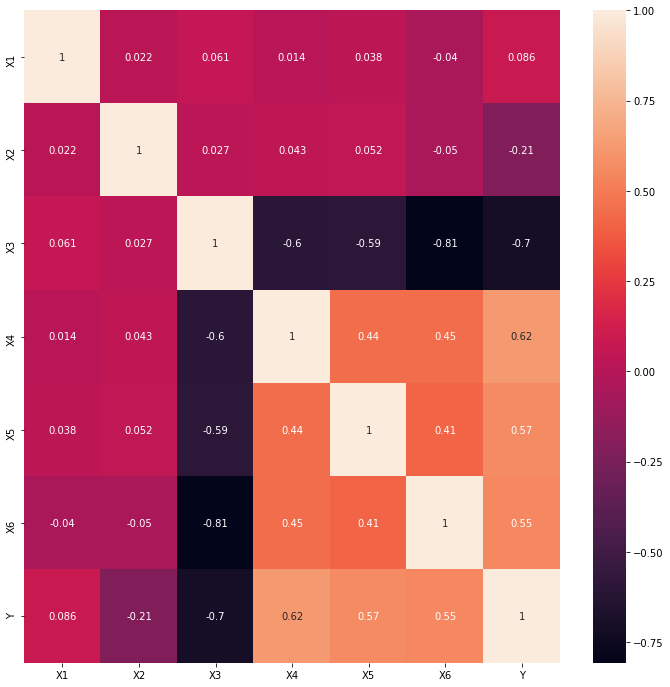

In [372]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

In [373]:
plain_result=pd.DataFrame(columns=['model','R2','Explained-variance','Max Error','Avg Abs Error','Avg sq error','Avg abs % Error'])


In [374]:
def calc_res(model,x_col,y_col,table):
  y=df[y_col]
  x=df[x_col]
  ypred=model.predict(x)
  data={'model':y_col+" "+" ".join(x_col),'R2':model.score(x,y)*100,'Explained-variance':metrics.explained_variance_score(y,ypred),'Max Error':metrics.max_error(y,ypred),"Avg Abs Error":metrics.mean_absolute_error(y,ypred),"Avg sq error":metrics.mean_squared_error(y,ypred),"Avg abs % Error":metrics.mean_absolute_percentage_error(y,ypred)*100}
  table = table.append(data, ignore_index = True)
  return table

In [375]:
def plt_resi(model,x,y):
  y_pred=model.predict(x)
  e=y-y_pred
  plt.scatter(y_pred, e ,c="green")
  plt.plot([y_pred.min(), y_pred.max()], [0, 0], linewidth=2);

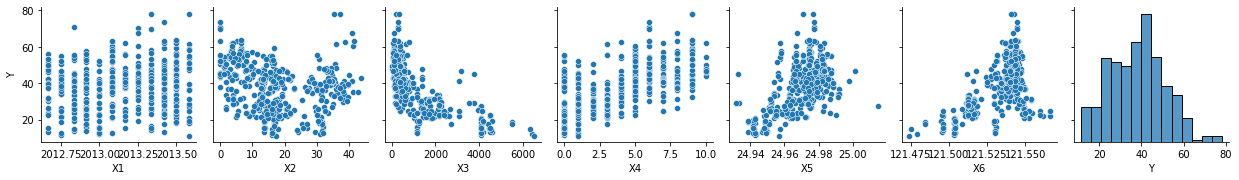

In [376]:
pp = sns.pairplot(data=df,y_vars=['Y'])

X1 is the varible which stores date of sale. We cannot see any trend in house prices with respect to time. So we will be droping this variable.

X2 doesnt have any correlation with y, so we will not use it

X3 has strong correlation with X4,X5 and X6 so we willbe droping this variable too.

# Model 1

In [377]:
x_col=['X4','X5','X6']
y_col='Y'

In [378]:
y=df[y_col]
x=df[x_col]
from sklearn import linear_model 
reg1_1 = linear_model.LinearRegression().fit(x, y)
plain_result=calc_res(reg1_1,x_col,y_col,plain_result)

In [379]:
plain_result

,model,R2,Explained-variance,Max Error,Avg Abs Error,Avg sq error,Avg abs % Error
0,Y X4 X5 X6,54.52748,0.545275,29.79474,6.802966,76.572139,19.163574


Residual Plots

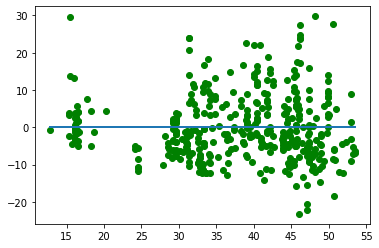

In [380]:
plt_resi(reg1_1,x,y)

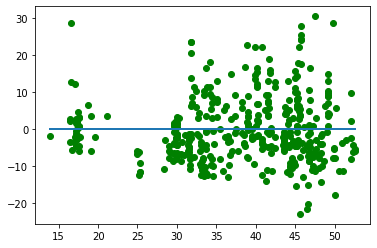

In [381]:
plt_resi(reg1_2,x,y)

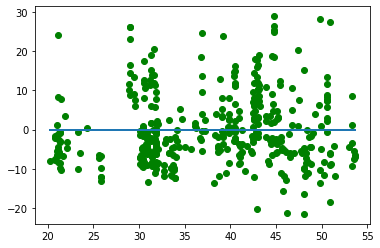

In [382]:
plt_resi(reg1_3,x,y)

#Model 2

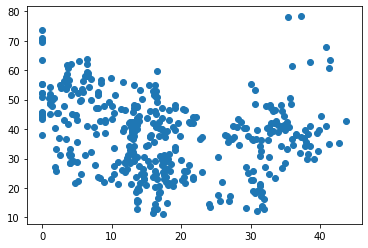

In [383]:
plt.scatter(df['X2'], df['Y'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


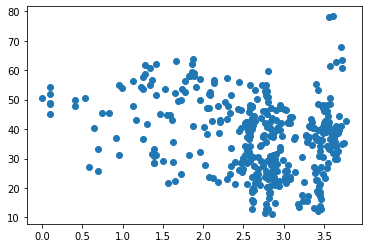

In [384]:
plt.scatter(np.log(df['X2']), df['Y'])

In [385]:
df['logX2']=np.log(df['X2'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


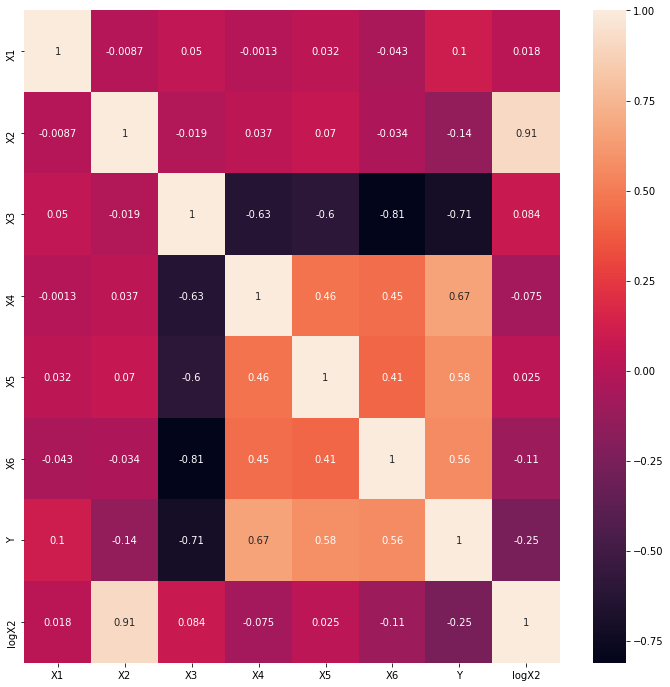

In [386]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

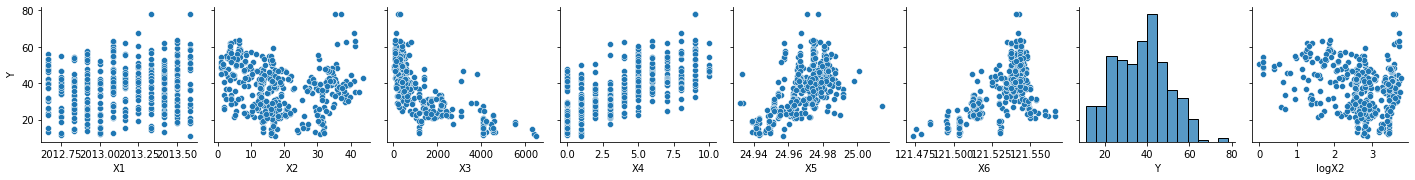

In [387]:
pp = sns.pairplot(data=df,y_vars=['Y'])

X1 is the varible which stores date of sale. We cannot see any trend in house prices with respect to time. So we will be droping this variable.

We can see that X2 vs Y doest have any linearity. But when we transform X2 to Log x2 there is some linearity and also the correlation coeff has also increased from -0.14 to -0.25. So we will be using logx2 in our model. 

X3 has strong correlation with X4,X5 and X6 so we willbe droping this variable too.

In [388]:
x_col=['logX2','X4','X5','X6']
y_col='Y'
y=df[y_col]
x=df[x_col]
from sklearn import linear_model 
reg2_1 = linear_model.LinearRegression().fit(x, y)
plain_result=calc_res(reg2_1,x_col,y_col,plain_result)

Residual Plots

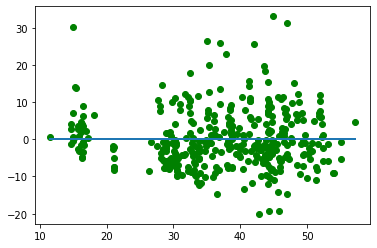

In [389]:
plt_resi(reg2_1,x,y)

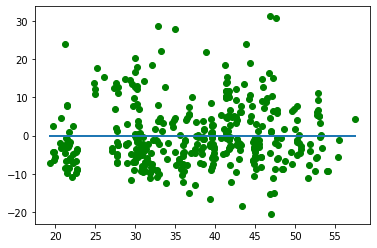

In [390]:
plt_resi(reg2_2,x,y)

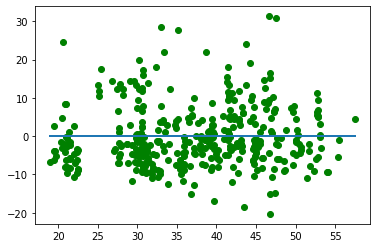

In [391]:
plt_resi(reg2_3,x,y)

Transformations

# Model 3

In [392]:
df['logY']=np.log(df['Y'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

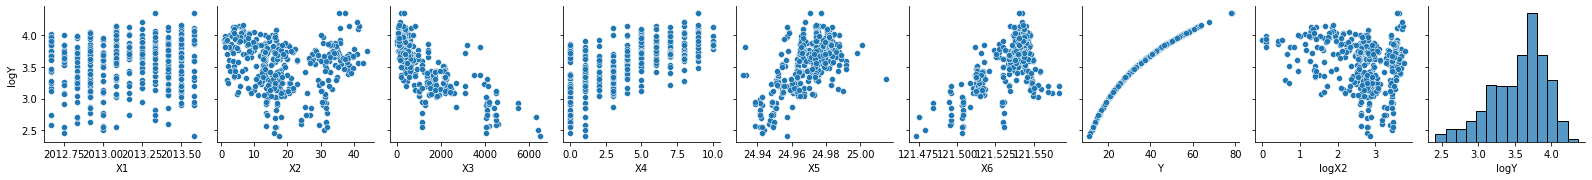

In [393]:
pp = sns.pairplot(data=df,y_vars=['logY'])

X1 is the varible which stores date of sale. We cannot see any trend in house prices with respect to time. So we will be droping this variable.

X2 doesnt have any correlation with y, so we will not use it

X3 has strong correlation with X4,X5 and X6 so we willbe droping this variable too.

In [394]:
x_col=['logX2','X4','X5','X6']
y_col='logY'
y=df[y_col]
x=df[x_col]

In [395]:
from sklearn import linear_model 
reg3_1 = linear_model.LinearRegression().fit(x, y)
plain_result=calc_res(reg3_1,x_col,y_col,plain_result)

Residual Plots

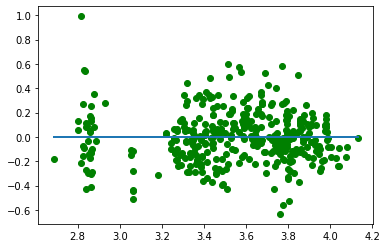

In [396]:
plt_resi(reg3_1,x,y)

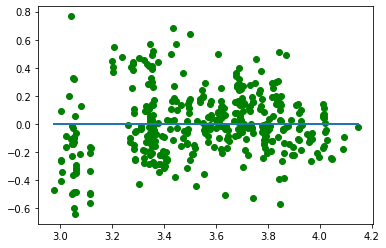

In [397]:
plt_resi(reg3_2,x,y)

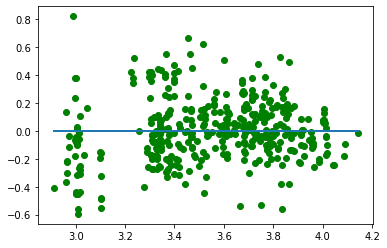

In [398]:
plt_resi(reg3_3,x,y)

conclusion:

Model 3 has the highest R2, lowest average error. So model 3 will be best to use.


In [399]:
plain_result

,model,R2,Explained-variance,Max Error,Avg Abs Error,Avg sq error,Avg abs % Error
0,Y X4 X5 X6,54.527480,0.545275,29.794740,6.802966,76.572139,19.163574
1,Y logX2 X4 X5 X6,62.609659,0.626097,33.079047,5.812503,59.274164,16.804005
2,logY logX2 X4 X5 X6,69.353104,0.693531,0.991166,0.159779,0.043746,4.609167
